In [1]:
from urllib.request import Request

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from epf.util import load_and_concat_data

2025-05-04 16:58:17.632 | INFO     | epf.config:<module>:18 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-04 16:58:17.632 | INFO     | epf.config:create_dir:14 - DATA_DIR path is: C:\Users\valen\PycharmProjects\epf\data
2025-05-04 16:58:17.632 | INFO     | epf.config:create_dir:14 - RAW_DATA_DIR path is: C:\Users\valen\PycharmProjects\epf\data\raw
2025-05-04 16:58:17.632 | INFO     | epf.config:create_dir:14 - INTERIM_DATA_DIR path is: C:\Users\valen\PycharmProjects\epf\data\interim
2025-05-04 16:58:17.632 | INFO     | epf.config:create_dir:14 - PROCESSED_DATA_DIR path is: C:\Users\valen\PycharmProjects\epf\data\processed
2025-05-04 16:58:17.632 | INFO     | epf.config:create_dir:14 - TRAIN_DATA_DIR path is: C:\Users\valen\PycharmProjects\epf\data\processed\train_data
2025-05-04 16:58:17.632 | INFO     | epf.config:create_dir:14 - MODELS_DIR path is: C:\Users\valen\PycharmProjects\epf\models
2025-05-04 16:58:17.632 | INFO     | epf.config:create_dir:14 - PREDICTIONS_D

In [2]:
file_paths = {'de_prices': ['de_prices_2020.csv', 'de_prices_2021.csv', 'de_prices_2022.csv', 'de_prices_2023.csv', 'de_prices_2024.csv']}

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

In [3]:
tmp = []

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])
    tmp.append(data)

df = pd.concat(tmp, axis=1)

In [4]:
df['volatility'] = df['de_prices'].rolling(window=24).std()
df['year'] = df.index.year
df['day'] = [x.strftime('%j') for x in df.index]
df['week'] = [x.strftime('%W') for x in df.index]

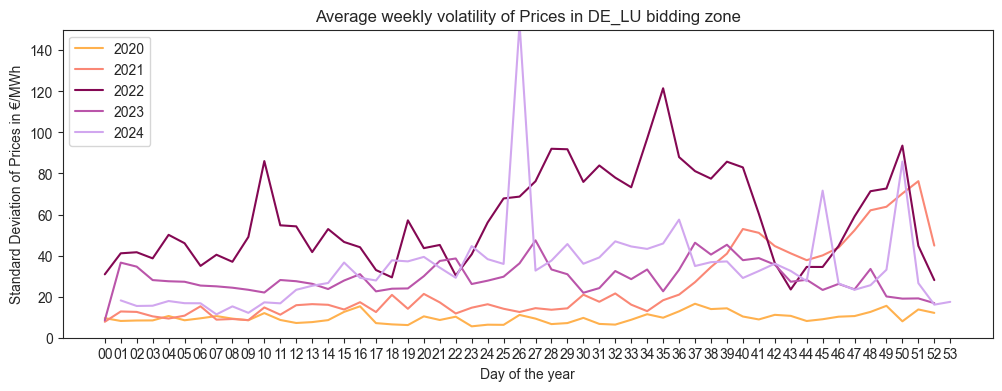

In [57]:
df_plot_volatility = df[['volatility', 'year', 'week']].groupby(['week', 'year']).mean()[['volatility']].reset_index()
df_plot_volatility.drop(df_plot_volatility[df_plot_volatility['year'] == 2019].index, inplace=True)

palette = {
    2020: COLORS['orange'],
    2021: COLORS['light_orange'],
    2022: COLORS['magenta'],
    2023: COLORS['purple'],
    2024: COLORS['light_purple'],
}

sns.set_style('ticks')

plt.figure(figsize=(12, 4))
sns.lineplot(data = df_plot_volatility, x='week', y='volatility', hue='year', palette=palette, legend=True)
plt.title('Average weekly volatility of Prices in DE_LU bidding zone')
plt.xlabel('Day of the year')
plt.ylabel('Standard Deviation of Prices in €/MWh')
plt.ylim(0, 150)
plt.legend(loc='upper left')

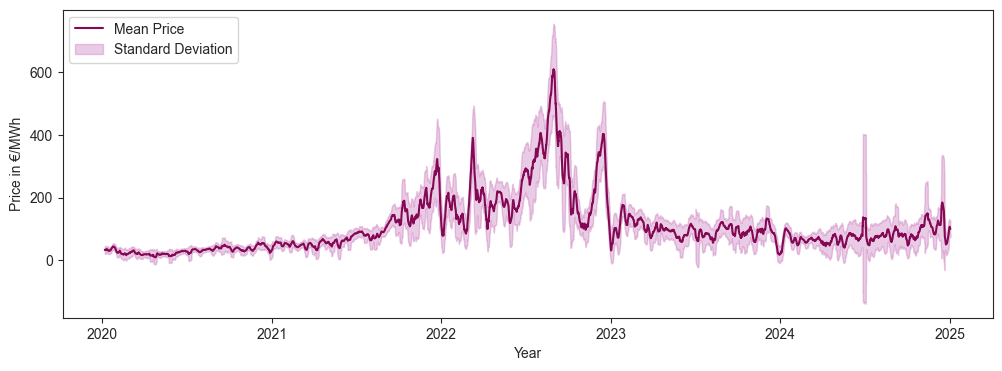

In [6]:
df['mean_price'] = df['de_prices'].rolling(window=24*7).mean()
df['std_dev'] = df['de_prices'].rolling(window=24*7).std()

df['upper_band'] = df['mean_price'] + df['std_dev']
df['lower_band'] = df['mean_price'] - df['std_dev']

sns.set_style('ticks')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['mean_price'], color=COLORS['magenta'], label='Mean Price')
plt.fill_between(df.index, df['lower_band'], df['upper_band'], color=COLORS['purple'], alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Price in €/MWh')
plt.legend(loc='upper left')

#plt.title('Average weekly volatility of Prices in DE_LU bidding zone')

plt.savefig("../reports/figures/volatility.pdf", dpi=300, bbox_inches='tight')

In [51]:
import requests
import pandas as pd

r_de_load = requests.get("https://api.energy-charts.info/public_power?country=de&start=2022-12-31T23:00Z&end=2024-12-31T22:45Z")
r_ch_load = requests.get("https://api.energy-charts.info/public_power?country=ch&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")
r_dk_load = requests.get("https://api.energy-charts.info/public_power?country=dk&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")
r_fr_load = requests.get("https://api.energy-charts.info/public_power?country=fr&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")

r_de_prices = requests.get("https://api.energy-charts.info/price?bzn=DE-LU&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")
r_ch_prices = requests.get("https://api.energy-charts.info/price?bzn=CH&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")
r_dk1_prices = requests.get("https://api.energy-charts.info/price?bzn=DK1&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")
r_dk2_prices = requests.get("https://api.energy-charts.info/price?bzn=DK2&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")
r_fr_prices = requests.get("https://api.energy-charts.info/price?bzn=FR&start=2022-12-31T23:00Z&end=2024-12-31T22:00Z")

In [57]:
r = [r_de_load, r_ch_load, r_dk_load, r_fr_load, r_de_prices, r_ch_prices, r_dk1_prices, r_dk2_prices, r_fr_prices]

In [60]:
for _ in r:
    print(_.ok)

True
True
True
True
True
True
True
True
True


In [65]:
timestamp = [ts.json()['unix_seconds'] for ts in r]

In [94]:
# give me all keys and all name values of the production data key
for i in range(len(r)):
    for key, value in r[i].json().items():
        if key == 'production_types':
            print(f"Key: {key}")
            val = [val['name'] for val in value]
            print(f"Value: {val}")

Key: production_types
Value: ['Hydro pumped storage consumption', 'Cross border electricity trading', 'Nuclear', 'Hydro Run-of-River', 'Biomass', 'Fossil brown coal / lignite', 'Fossil hard coal', 'Fossil oil', 'Fossil gas', 'Geothermal', 'Hydro water reservoir', 'Hydro pumped storage', 'Others', 'Waste', 'Wind offshore', 'Wind onshore', 'Solar', 'Load', 'Residual load', 'Renewable share of load', 'Renewable share of generation', 'Fossil coal-derived gas']
Key: production_types
Value: ['Cross border electricity trading', 'Nuclear', 'Hydro Run-of-River', 'Hydro water reservoir', 'Hydro pumped storage', 'Wind onshore', 'Solar', 'Load', 'Residual load', 'Renewable share of load', 'Renewable share of generation']
Key: production_types
Value: ['Cross border electricity trading', 'Biomass', 'Fossil hard coal', 'Fossil oil', 'Fossil gas', 'Waste', 'Wind offshore', 'Wind onshore', 'Solar', 'Load', 'Residual load', 'Renewable share of load', 'Renewable share of generation']
Key: production_type

In [96]:
# construct a dataframe containing the data from the requests. attention: from ch, dk and fr load sets i only want to retrieve the entire load. from de load i only want lignite, hard coal, gas, wind onshore, wind offshore, solar and the overall load. the request r_de_load has to be resampled because its frequency is 15 min so only take the value for every full hour
df = pd.DataFrame()

for i in range(len(r)):
    for key, value in r[i].json().items():
        if key == 'production_types':
            for val in value:
                if val['name'] in ['Lignite', 'Hard Coal', 'Gas', 'Wind Onshore', 'Wind Offshore', 'Solar', 'Total Load']:
                    df[val['name']] = pd.Series(val['data']).resample('H').mean()
        elif key == 'price':
            df['Price'] = pd.Series(value).resample('H').mean()
        elif key == 'total_load':
            df['Total Load'] = pd.Series(value).resample('H').mean()

C:\Users\valen\AppData\Local\Temp\ipykernel_1844\1986929208.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[val['name']] = pd.Series(val['data']).resample('H').mean()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [46]:
df

NameError: name 'df' is not defined